# RMSE Plots Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the different CSVs as DataFrames
Specify the paths to the CSVs

In [2]:
in_paths_dict = {
    'offline_lambda': '/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_return_runs.csv',
    'strace_0sinit': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_0srinit_runs.csv',
    'strace_1sinit': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_1srinit_runs.csv',
}

In [3]:
df_dict = {}

for k in in_paths_dict:
    cur_path = in_paths_dict[k]
    df_dict[k] = pd.read_csv(cur_path)
    print(f'{len(df_dict[k])}\t{k}\t{cur_path}')

6000	offline_lambda	/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_return_runs.csv
6000	strace_0sinit	/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_0srinit_runs.csv
6000	strace_1sinit	/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_1srinit_runs.csv


In [4]:
df_dict['offline_lambda'][0:3]

,Unnamed: 0,gamma,lr,lambda,seed,num_episodes,n_states,final_rmse
0,0,1.0,0.001,1.0,0,10,19,0.269796
1,1,1.0,0.001,1.0,2,10,19,0.264946
2,2,1.0,0.001,1.0,4,10,19,0.263184


### Get lowest RMSE for each algorithm

In [5]:
for k in df_dict:
    print(f'\n{k}')
    cur_df = df_dict[k]
    
    # Average over all but lr and lambda
    avg_cur_df = cur_df.groupby(['lambda', 'lr']).mean()
    avg_cur_df = avg_cur_df.reset_index()
    
    # Optional deletes
    del avg_cur_df['Unnamed: 0']
    del avg_cur_df['seed']
    del avg_cur_df['num_episodes']
    del avg_cur_df['n_states']
    
    # Find the minimum final RMSE
    min_rmse_idx = avg_cur_df['final_rmse'].idxmin()
    min_rmse_series = avg_cur_df.iloc[min_rmse_idx]
    
    print(min_rmse_series)
    


offline_lambda
lambda        0.900000
lr            0.100000
gamma         1.000000
final_rmse    0.122265
Name: 50, dtype: float64

strace_0sinit
lambda        0.400000
lr            0.700000
gamma         1.000000
final_rmse    0.121842
Name: 26, dtype: float64

strace_1sinit
lambda        0.800000
lr            0.300000
gamma         1.000000
final_rmse    0.080179
Name: 37, dtype: float64


## Plot RMSE
Specify keys to plot

In [6]:
keys_2_plot = [k for k in df_dict]
keys_2_plot

['offline_lambda', 'strace_0sinit', 'strace_1sinit']

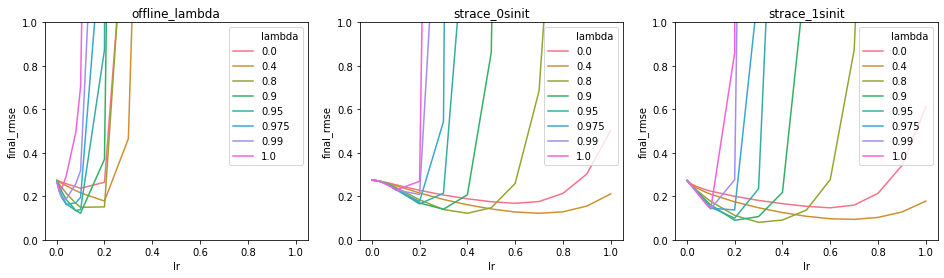

In [8]:
# ==
# Specify plots
plot_x = 'lr'
plot_y = 'final_rmse'
plot_hue = 'lambda'
plot_ci = None  # Estimator, [None, 'sd']



# ==
# Generate palette, assume all have same # hues
n_hues = len(set(df_dict[keys_2_plot[0]][plot_hue].values))
c_palette = sns.color_palette("husl", n_hues)

# ==
# Plot

plt.figure(figsize=(16, 4))

for i in range(len(keys_2_plot)):
    # Current data
    cur_df = df_dict[keys_2_plot[i]]
    
    # Plot
    plt.subplot(1, len(keys_2_plot), (i+1))
    sns.lineplot(x=plot_x, y=plot_y, hue=plot_hue, 
                 ci=plot_ci, 
                 palette = c_palette,
                 data=cur_df)
    
    plt.ylim([0, 1.0])
    plt.title(keys_2_plot[i])


#### Rough notes on experimental conditions

The above are all ran on random chains with
- gamma = 1.0
- num_episodes = 10
- n_states = 19

The independently varying variables are:
- learning rate = `[0.001, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`
- lambdas = `[1.0, 0.99, 0.975, 0.95, 0.9, 0.8, 0.4, 0.0]`
- seeds =  `[s * 2 for s in range(50)]`
